In [1]:
from pyrosm import OSM, get_data

/home/hentenka/miniconda3/envs/pyrosm/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [13]:
osm = OSM(get_data("helsinki_pbf"))

In [14]:
e = osm.get_network()

<AxesSubplot:>

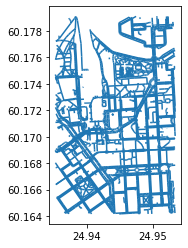

In [15]:
e.plot()

In [16]:
e.head()

,access,bicycle,bridge,cycleway,est_width,foot,footway,highway,int_ref,lanes,...,surface,tunnel,width,id,timestamp,version,tags,geometry,osm_type,length
0,None,None,None,None,None,None,None,unclassified,None,2,...,paved,None,None,4236349,1380031970,21,"{""name:fi"":""Erottajankatu"",""name:sv"":""Skillnad...","MULTILINESTRING ((24.94327 60.16651, 24.94337 ...",way,13.869
1,None,None,None,None,None,None,None,unclassified,None,2,...,paved,None,None,4243035,1543430213,12,"{""name:fi"":""Korkeavuorenkatu"",""name:sv"":""H\u00...","MULTILINESTRING ((24.94567 60.16767, 24.94567 ...",way,50.976
2,None,None,None,None,None,None,None,residential,None,2,...,cobblestone,None,None,4243036,1543430213,21,"{""hazmat:A"":""destination"",""name:fi"":""Fabianink...","MULTILINESTRING ((24.94944 60.16791, 24.94946 ...",way,85.834
3,None,None,None,None,None,None,None,unclassified,None,None,...,asphalt,None,None,4247500,1545207617,16,"{""name:fi"":""Yliopistonkatu"",""name:sv"":""Univers...","MULTILINESTRING ((24.94540 60.16981, 24.94555 ...",way,14.108
4,None,None,None,None,None,None,None,secondary,None,2,...,cobblestone,None,None,4247501,1549629388,25,"{""embedded_rails"":""tram"",""name:fi"":""Vilhonkatu...","MULTILINESTRING ((24.94745 60.17209, 24.94730 ...",way,12.739


In [17]:
b = osm.get_buildings()

<AxesSubplot:>

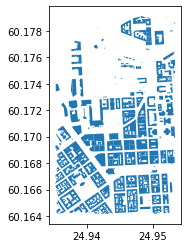

In [18]:
b.plot()

# Working with graphs

If you want to analyze the street networks using your favourite network analysis library, it is easy to export the street network from Pyrosm into a graph. Supported graphs are NetworkX (+OSMnx), iGraph and Pandana. 

Exporting the network into a graph using Pyrosm can be done as follows:

 1. Retrieve the graph elements (nodes and edges) from a given OSM network by specifying `to_graph=True` in the `osm.get_network()` function.
 2. Use `osm.to_graph()` function to convert the nodes and edges into a graph. 
    - The output graph type can be specified with `kind` parameter. Available graph types are: `"networkx"` (default), `"igraph"` and `"pandana"`.
    


In [19]:
from pyrosm.graphs import to_networkx
import osmnx as ox
import networkx as nx

nodes, edges = osm.get_network(to_graph=True)

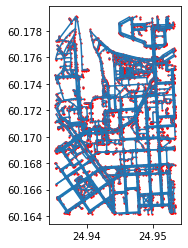

In [23]:
ax = edges.plot()
ax = nodes.plot(ax=ax, color="red", markersize=1.5)

In [24]:
edges.head()

,access,bicycle,bridge,cycleway,est_width,foot,footway,highway,int_ref,lanes,...,width,id,timestamp,version,tags,osm_type,u,v,length,geometry
0,None,None,None,None,None,None,None,unclassified,None,2,...,None,4236349,1380031970,21,"{""name:fi"":""Erottajankatu"",""name:sv"":""Skillnad...",way,1372477605,292727220,9.370,"LINESTRING (24.94327 60.16651, 24.94337 60.16644)"
1,None,None,None,None,None,None,None,unclassified,None,2,...,None,4236349,1380031970,21,"{""name:fi"":""Erottajankatu"",""name:sv"":""Skillnad...",way,292727220,2394117042,4.499,"LINESTRING (24.94337 60.16644, 24.94340 60.16641)"
2,None,None,None,None,None,None,None,unclassified,None,2,...,None,4243035,1543430213,12,"{""name:fi"":""Korkeavuorenkatu"",""name:sv"":""H\u00...",way,296250563,2049084195,4.174,"LINESTRING (24.94567 60.16767, 24.94567 60.16763)"
3,None,None,None,None,None,None,None,unclassified,None,2,...,None,4243035,1543430213,12,"{""name:fi"":""Korkeavuorenkatu"",""name:sv"":""H\u00...",way,2049084195,60072359,21.692,"LINESTRING (24.94567 60.16763, 24.94569 60.16744)"
4,None,None,None,None,None,None,None,unclassified,None,2,...,None,4243035,1543430213,12,"{""name:fi"":""Korkeavuorenkatu"",""name:sv"":""H\u00...",way,60072359,6100704327,19.083,"LINESTRING (24.94569 60.16744, 24.94571 60.16726)"


In [25]:
nodes.head()

,id,version,changeset,tags,timestamp,lon,lat,geometry
0,25291537,11,0,None,1418245031,24.937025,60.164326,POINT (24.93703 60.16433)
1,25291550,6,0,None,1418417272,24.940428,60.164349,POINT (24.94043 60.16435)
2,25291564,7,0,None,1546291613,24.941679,60.165951,POINT (24.94168 60.16595)
3,25291565,6,0,{'highway': 'traffic_signals'},1290870083,24.939344,60.165134,POINT (24.93934 60.16513)
4,25291567,6,0,None,1546291613,24.942780,60.165146,POINT (24.94278 60.16515)


In [26]:
G = to_networkx(nodes, edges)

In [27]:
G

As we can see the output is now a NetworkX MultiDiGraph. 

By default, the graph is exported in such a way that you can continue your analysis using `OSMnx` library that has many useful functions for analyzing and visualizing street networks. 

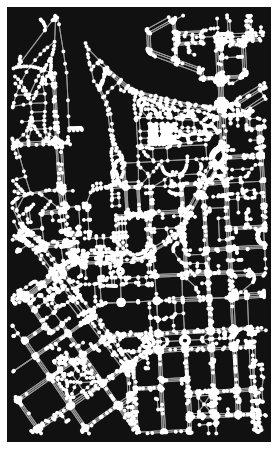

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [29]:
# Plot the graph with OSMnx
ox.plot_graph(G)

## Calculate shortest paths



In [49]:
source_address = "Bulevardi 5, Helsinki"
target_address = "Unioninkatu 40, Helsinki"

source = ox.geocode(source_address)
target = ox.geocode(target_address)

In [50]:
print(source)
print(target)

(60.1651049, 24.9387954)
(60.1726635, 24.949283641875)


In [51]:
# Find the closest nodes from the graph
source_node = ox.get_nearest_node(G, source)
target_node = ox.get_nearest_node(G, target)

In [52]:
print(source_node)
print(target_node)

537519894
1012307807


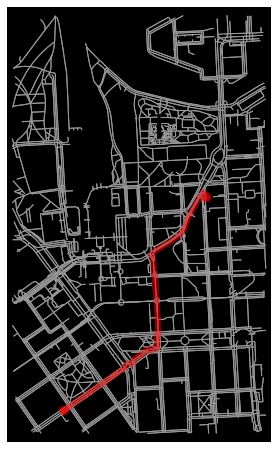

In [53]:
# Find shortest path (by distance)
import networkx as nx
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')